# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('sinasc_RO_2019.csv')
df['APGAR5']

0        10.0
1         9.0
2        10.0
3        10.0
4        10.0
         ... 
27023     9.0
27024     9.0
27025    10.0
27026     9.0
27027     8.0
Name: APGAR5, Length: 27028, dtype: float64

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [ ]:
# aqui cria-se uma nova coluna chamada APGAR5_CAT, que é a categorização do
# APGATR5.

df.loc[df['APGAR5'] <= 3, 'APGAR5_CAT'] = 'asfixia grave'
df.loc[(df['APGAR5'] > 3) & (df['APGAR5'] <= 5),
           'APGAR5_CAT'] = 'asfixia moderada'
df.loc[(df['APGAR5'] > 5) & (df['APGAR5'] <= 7),
           'APGAR5_CAT'] = 'asfixia leve'
df.loc[df['APGAR5'] > 7, 'APGAR5_CAT'] = 'normal'

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

<ipython-input-28-38848f2eaa87>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  graf1 = sns.catplot(x='SEXO', y='APGAR5'


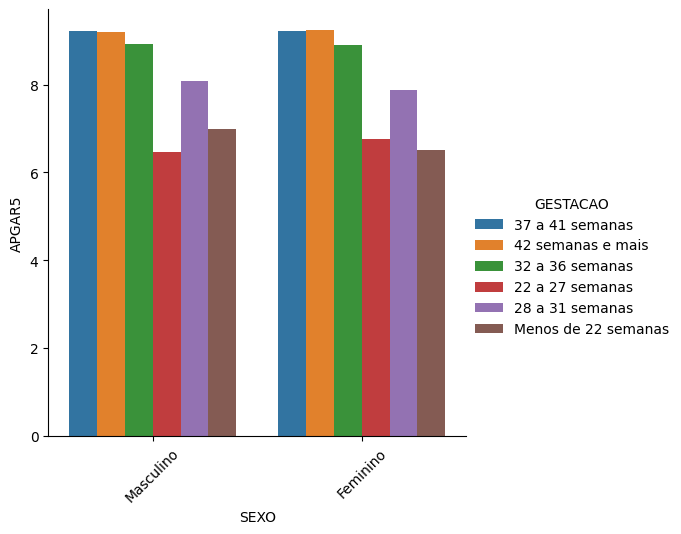

In [ ]:
# aqui nomeei o gráfico de graf1, e nele usamos o catplot para conseguirmos usar
# comparar 3 variáveis

graf1 = sns.catplot(x='SEXO', y='APGAR5'
            , hue = 'GESTACAO'
            , kind='bar'
            , data=df
            , ci = None
           )

graf1.set_xticklabels(rotation=45)

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [ ]:
# aqui usamos crosstab para criar nossa tabela cruzando os dados e obtendo a
# quantidade relativa de cada gestação

freq = pd.crosstab(df['GESTACAO'], df['APGAR5'])
freq

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [ ]:
# aqui calculamos a frequência percentual do APGAR5 para cada GESTAÇÃO

freq_APGAR5_GESTACAO = freq.div(freq.sum(axis = 1), axis = 0)
freq_APGAR5_GESTACAO

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,0.082353,0.000000,0.094118,0.070588,0.011765,0.000000,0.023529,0.117647,0.282353,0.223529,0.094118
28 a 31 semanas,0.000000,0.000000,0.012346,0.006173,0.030864,0.043210,0.043210,0.067901,0.376543,0.339506,0.080247
32 a 36 semanas,0.000895,0.000895,0.000895,0.000895,0.003581,0.004924,0.007610,0.025067,0.162041,0.585049,0.208147
37 a 41 semanas,0.000222,0.000888,0.000133,0.000222,0.000311,0.000932,0.001998,0.006704,0.062913,0.602273,0.323403
42 semanas e mais,0.001433,0.000000,0.000000,0.000000,0.000000,0.001433,0.001433,0.007163,0.063037,0.606017,0.319484
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

##### aqui criamos o gráfico da tabela de cima. Podemos concluir que corrobora quase perfeitamente com a afirmação dos médicos sobre a gestação que tem menos e 37 semanas ser pré-matura. Vemos que há o dobro de frequência do nível 8 pra cima do APGAR5 a partir de 32 semanas, que significa que a partir desse ponto os bebês tem muito menos chances de terem asfixia depois de 5 minutos de nascimento.

<Axes: xlabel='GESTACAO'>

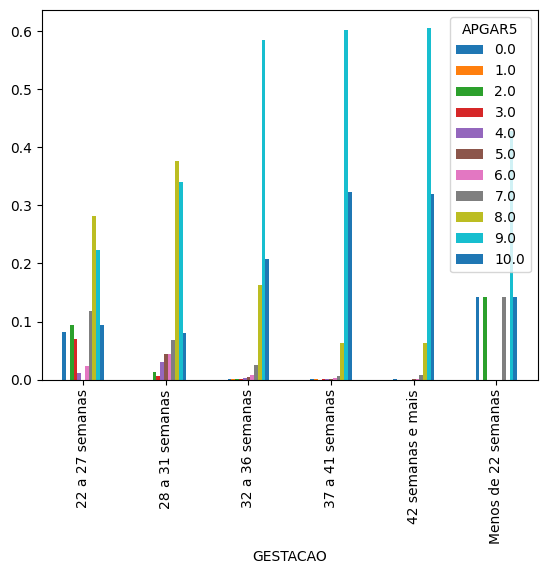

In [ ]:
freq_APGAR5_GESTACAO.plot.bar()

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

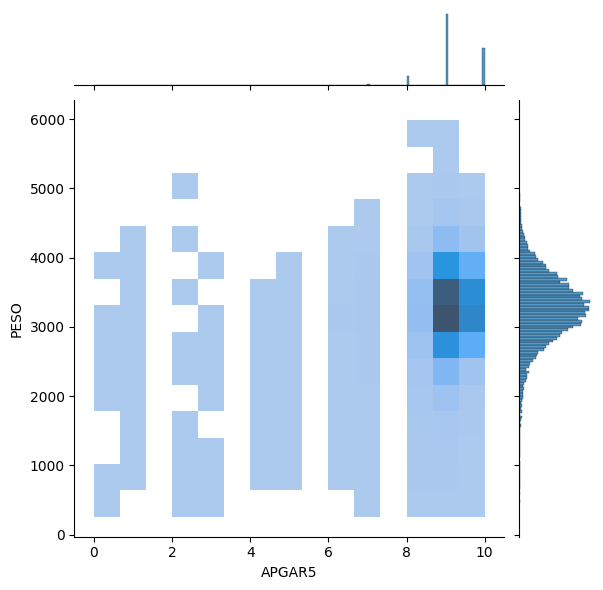

In [ ]:
sns.jointplot(x = 'APGAR5'
              , y = 'PESO'
              , data = df
              , kind="hist"
              , bins = [15, 15])

###### analisando o gráfico acima, percebemos:


1. que os maiores níveis de AGPAR5, entre 8 e 10, no qual os bebês não tiveram problemams de asfixia, estão localizados entre 3 a 4kg do bebê.
2. Nos níveis mais baixos, entre 0 e 2, podemos ver que a cima de 4kg não existem casos, porém a baixo de 3kg sim. Levando em consideração a afirmação 1, bebês com menos de 3kg podem ter mais chances de terem problemas de asfixia no nascimento comparado aos bebês entre 3kg e 4kg
